`Web Scrapping`

In [1]:
import requests
import bs4

In [2]:
url = "https://www.mygov.in/corona-data/covid19-statewise-status/"

In [3]:
print(url)

https://www.mygov.in/corona-data/covid19-statewise-status/


In [4]:
page = requests.get(url)

In [5]:
page.status_code

200

In [7]:
print(page.text)

﻿<!DOCTYPE html>
<html data-ng-app="site_stats_display" xml:lang="en"
version="XHTML+RDFa 1.0" dir="ltr"
  xmlns:fb="http://ogp.me/ns/fb#"
  xmlns:og="http://ogp.me/ns#"
  xmlns:article="http://ogp.me/ns/article#"
  xmlns:book="http://ogp.me/ns/book#"
  xmlns:profile="http://ogp.me/ns/profile#"
  xmlns:video="http://ogp.me/ns/video#">

<head>
    <link rel="manifest" href="/manifest.json">
    <meta name="apple-itunes-app" content="app-id=1423088445">
    <!--[if IE]><![endif]-->
<!--[if IE]><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
<![endif]--><meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<link rel="shortcut icon" href="https://www.mygov.in/sites/all/themes/mygov/favicon.ico" type="image/vnd.microsoft.icon" />
<meta name="keywords" content="MyGov, India, Government, Citizen Platform, Technology, Growth, Development, Citizen Engagement, Governance" />
<meta name="generator" content="MyGov" />
<link rel="canonical" href="https://mygov.in/co

In [8]:
soup = bs4.BeautifulSoup(page.content)

In [35]:
data

['Andaman and Nicobar',
 '6603',
 '6283',
 '88',
 '35',
 '6568',
 '6267',
 '85',
 'Andhra Pradesh',
 '1435491',
 '1215683',
 '9372',
 '28',
 '1411320',
 '1194582',
 '9271',
 'Arunachal Pradesh',
 '21802',
 '19461',
 '81',
 '12',
 '21622',
 '19293',
 '78',
 'Assam',
 '328629',
 '281726',
 '2179',
 '18',
 '324979',
 '277501',
 '2123',
 'Bihar',
 '651909',
 '572987',
 '3832',
 '10',
 '645015',
 '558785',
 '3743',
 'Chandigarh',
 '55367',
 '47088',
 '635',
 '4',
 '54703',
 '46231',
 '625',
 'Chhattisgarh',
 '912477',
 '797150',
 '11734',
 '22',
 '907589',
 '785598',
 '11590',
 'Dadra and Nagar Haveli and Daman and Diu',
 '9550',
 '8745',
 '4',
 '26',
 '9447',
 '8576',
 '4',
 'Delhi',
 '1393867',
 '1309578',
 '21506',
 '7',
 '1387411',
 '1299872',
 '21244',
 'Goa',
 '135856',
 '105505',
 '2099',
 '30',
 '134542',
 '101712',
 '2056',
 'Gujarat',
 '752619',
 '638590',
 '9121',
 '24',
 '744409',
 '624107',
 '9039',
 'Haryana',
 '694427',
 '597676',
 '6685',
 '6',
 '685312',
 '582820',
 '6546',

In [27]:
data = []
c = 0
for item in soup.find_all('div', {'class': "field-item even"}):
    if not item.text.startswith('http') and not item.div and not item.span:
        c += 1
        if c > 12:
            #print(item.text)
            data.append(item.text)

In [28]:
data = data[:-5]

In [36]:

state_data = []
c = 1
sub_data = []
for item in data:
    if c <= 8:
        sub_data.append(item)
    else:
        state_data.append(sub_data)
        c = 1
        sub_data = [item]
    c += 1

In [38]:
import pandas as pd

In [63]:
i = 0
while i < len(state_data):
    state_data[i][1:] = list(map(int, state_data[i][1:]))
    i += 1

In [64]:
df = pd.DataFrame(state_data, columns=[ "STATE NAME", "TOTAL CONFIRMED", "CURED",  "DEATH",
                                      'one', 'two', 'three', 'four'],)
df.drop(['one', 'two', 'three', 'four'], inplace=True, axis=1)

In [65]:
df[df['STATE NAME'] == "Rajasthan"]

,STATE NAME,TOTAL CONFIRMED,CURED,DEATH
28,Rajasthan,859669,658510,6777


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATE NAME       35 non-null     object
 1   TOTAL CONFIRMED  35 non-null     int64 
 2   CURED            35 non-null     int64 
 3   DEATH            35 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ KB


`Decting Pattern`

In [68]:
df.sort_values("DEATH", ascending=False).head(5)

,STATE NAME,TOTAL CONFIRMED,CURED,DEATH
19,Maharashtra,5378452,4826371,81486
15,Karnataka,2203462,1581457,21837
8,Delhi,1393867,1309578,21506
30,Tamil Nadu,1598216,1361204,17670
33,Uttar Pradesh,1619645,1439096,17546


In [69]:
df.sort_values("TOTAL CONFIRMED", ascending=False).head(5)

,STATE NAME,TOTAL CONFIRMED,CURED,DEATH
19,Maharashtra,5378452,4826371,81486
15,Karnataka,2203462,1581457,21837
16,Kerala,2147967,1700528,6428
33,Uttar Pradesh,1619645,1439096,17546
30,Tamil Nadu,1598216,1361204,17670


In [70]:
df.sort_values("TOTAL CONFIRMED").head(5)

,STATE NAME,TOTAL CONFIRMED,CURED,DEATH
18,Lakshadweep,4767,3633,14
0,Andaman and Nicobar,6603,6283,88
22,Mizoram,8829,6687,25
7,Dadra and Nagar Haveli and Daman and Diu,9550,8745,4
29,Sikkim,11410,8109,205


In [72]:
df.sort_values("DEATH").head(5)

,STATE NAME,TOTAL CONFIRMED,CURED,DEATH
7,Dadra and Nagar Haveli and Daman and Diu,9550,8745,4
18,Lakshadweep,4767,3633,14
22,Mizoram,8829,6687,25
2,Arunachal Pradesh,21802,19461,81
0,Andaman and Nicobar,6603,6283,88


In [75]:
df.set_index("STATE NAME", inplace=True)

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline 

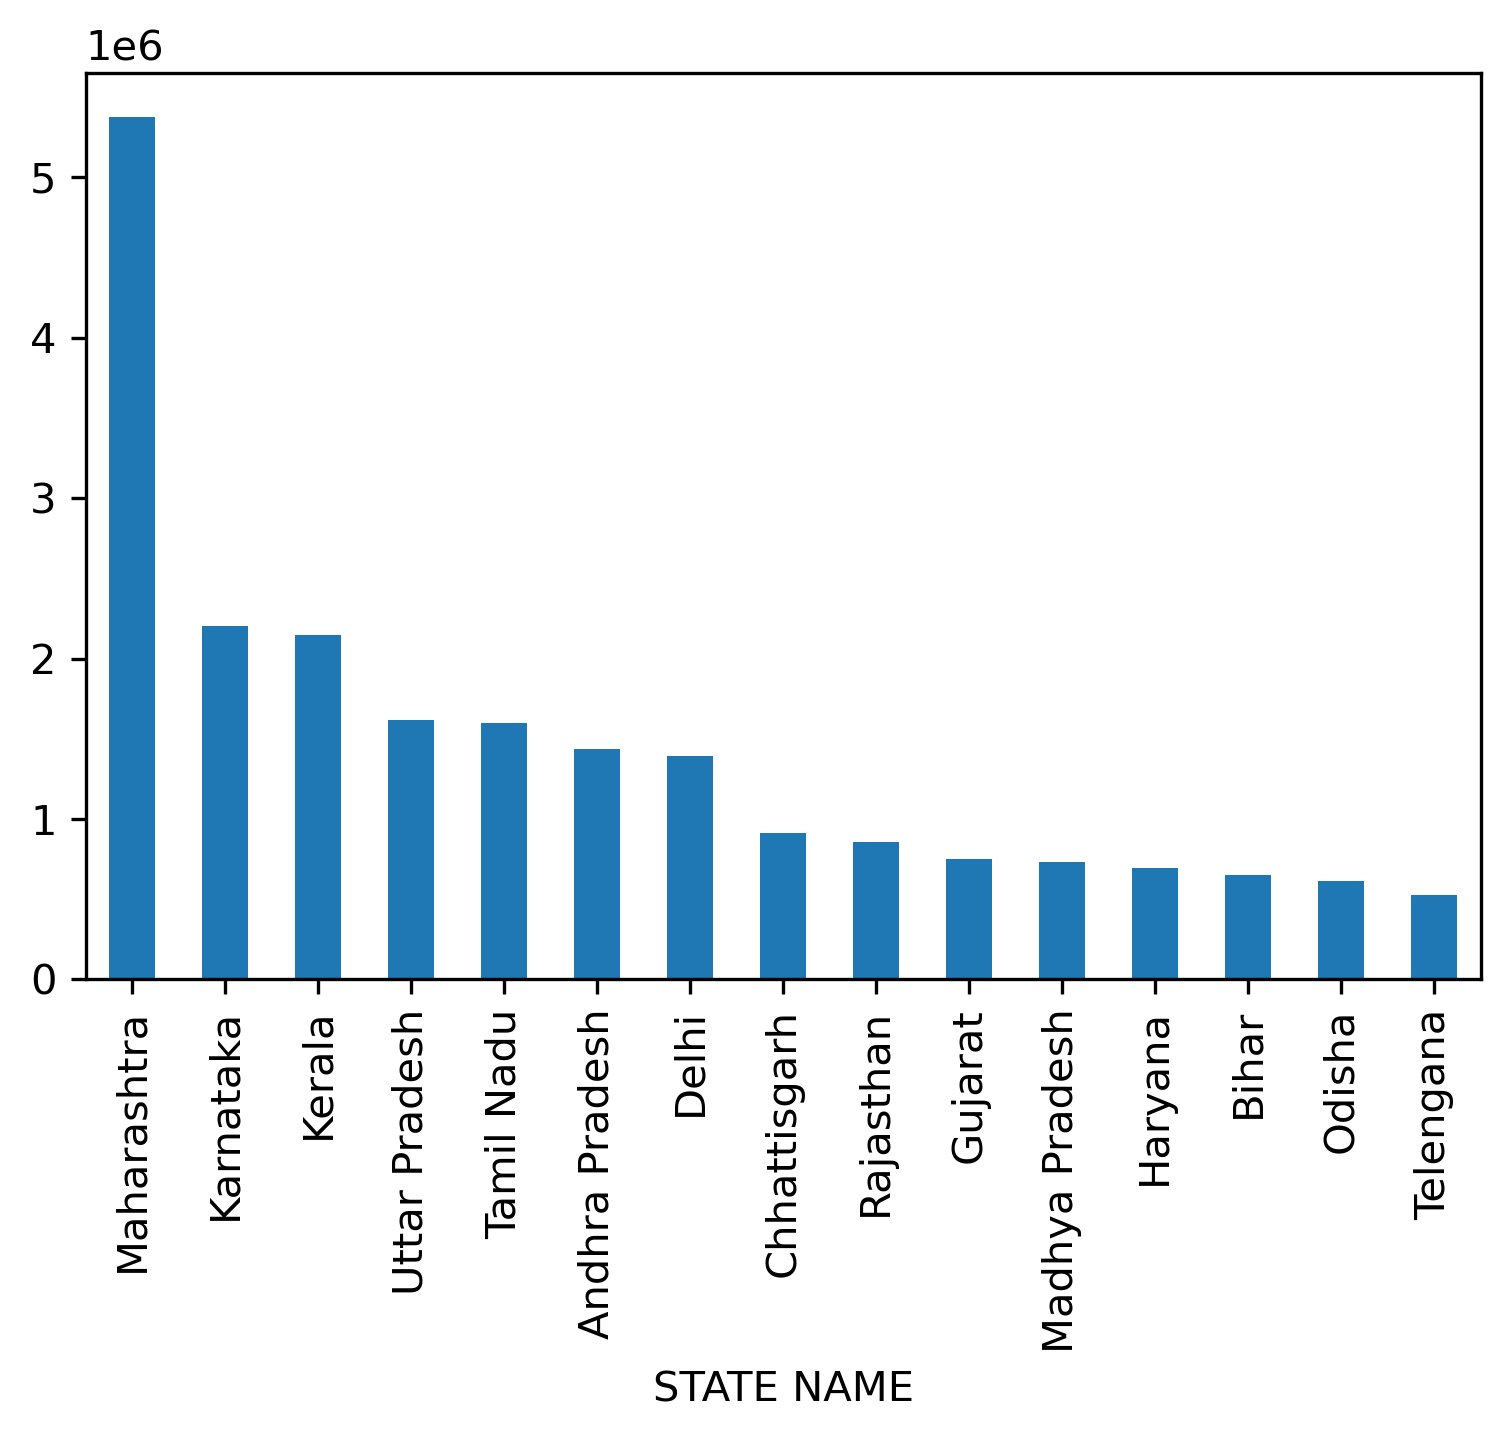

In [84]:
plt.figure(dpi=300)
df["TOTAL CONFIRMED"].sort_values(ascending=False)[:15].plot(kind='bar')
plt.show()